# **손글씨 인식 Hand Written Number**

In [ ]:
# 오늘 사용할 라이브러리를 읽어 들입니다. 

import numpy as np      # 배열관리
import pandas as pd     # 데이터 표 관리
import seaborn as sns   # 그래프 관리 (Heatmap)
import matplotlib.pyplot as plt # 그래프 관리 (imshow - 글씨 쓰기)


## **1. 배열 모양 바꾸기**

In [ ]:
# 1.1 배열의 생성
# 1차원 배열을 생성합니다. 
arr_1d = np.array([10,20,30,40])

# 2차원 배열을 생성합니다. 
arr_2d = np.array([[10,20,30,40],
                     [10,20,30,40],
                     [10,20,30,40],
                     [10,20,30,40]])

In [ ]:
# 1.2 1차원 배열의 모양을 확인합니다. 
arr_1d.shape

In [ ]:
# 1.3 2차원 배열의 모양을 확인합니다. 
arr_2d.*****

In [ ]:
# 1.4 1차원 배열을 아래와 같은 모양으로 변경합니다.
#   [[10, 20],
#    [30, 40]])

arr_1d.reshape(2,2)

In [ ]:
# 1.5 2차원 배열을 아래와 같은 모양으로 변경합니다.
#   [10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40]

arr_2d.****

In [ ]:
# 1.6 2차원 배열을 아래와 같은 모양으로 변경합니다.
""" 
       [[[10, 20],
        [30, 40]],

       [[10, 20],
        [30, 40]],

       [[10, 20],
        [30, 40]],

       [[10, 20],
        [30, 40]]]
"""

arr_2d.*****

## **2. 손글씨 데이터 MNIST 관찰하기**

In [ ]:
# 2.1 MNIST 손글씨 정보를 sklearn.dataset 의 load_digits 명령어를 사용해서 수집합니다. 

from sklearn.datasets import load_digits
digits = load_digits()

# digit의 images에는 우리가 알고 있는 개수의 데이터가 있을까요? 모양을 확인합니다. 
digits.images.shape

In [ ]:
# 2.2 digits.images 를 출력해봅니다. 
digits.images

In [ ]:
# 2.3 digits의 data 에는 우리가 알고 있는 개수의 데이터가 있을까요? 모양을 확인합니다. 
digits.data.*****

In [ ]:
# 2.4 digits의 data를 출력해봅니다. 

digits.data

In [ ]:
# 2.5 digits의 target 도 모양과 그 값을 확인해 봅니다. 
digits.target.****

In [ ]:
digits.****

In [ ]:
# 2.6  첫 번째 숫자가 0 인 모양입니다. digits.image 에서 0번째 항목을 선택해봅니다. 
# 0으로 보이나요?
digits.images[0]

In [ ]:
# 2.7 digits의 data의 0번째 항목을 image와 비교해봅니다. 
digits.****

Text(0.05, 0.05, '2')

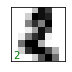

In [ ]:
# 2.8  아래는 맷플라립의 .imshow라는 시각화 도구를 사용해서 픽셀을 그려보았습니다. 
#  i 의 값을 변경하면서 그림을 출력해보세요.

i = 2    # <-  변경

fig, ax = plt.subplots( 1,1, figsize = (1,1),
                         subplot_kw = dict( xticks = [], yticks = []),
                         gridspec_kw = dict(hspace = 0.1, wspace= 0.1))

# digits.images에서 i번째 추출해서 시각화한다. 
ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')

# 숫자의 정답을 digits.target 에서 추출하여 좌측 하단에 초록색으로 표시한다. 
ax.text(0.05, 0.05, str(digits.target[i]),
          transform= ax.transAxes, color = 'green')

In [ ]:
# 2.9 한 번에 100개의 숫자를 시각화 한다. 
# for 반복문을 사용한다. 

# 10 x 10개의 공간을 만든다.
fig, axes = plt.subplots( 10,10, figsize = (8,8),
                         subplot_kw = dict( xticks = [], yticks = []),
                         gridspec_kw = dict(hspace = 0.1, wspace= 0.1))

# 100개의 숫자를 차례로 시각화 한다. 
for i , ax in enumerate (axes.flat):
  ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
  ax.text(0.05, 0.05, str(digits.target[i]),
          transform= ax.transAxes, color = 'green')

##**3. 머신러닝 학습/검증 데이터 분리**

In [ ]:
# 3.1 피처 feature 에 해당하는 digits.data를 X 에 저장한다. 
X = digits.****
X.shape

In [ ]:
# 3.2 타깃 target을 y 에 저장한다. 
y = digits.target
y.shape

In [ ]:
# 3.3 학습데이터와 검증데이터 분리한다. 20%를 검증용 test 데이터로 한다.
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = ******(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# 3.4 데이터 개수 확인
print(X_train.shape, X_test.shape)

##**4. kNN k 근접이웃 으로 분류하고 평가하기**
다음의 순서로 kNN 머신러닝을 수행합니다.
- 4.1 학습을 위한 알고리즘의 선택 : kNN = 알고리즘(이웃개수 지정)
- 4.2 학습 데이터로 모델을 훈련 : kNN.fit
- 4.3 훈련된 모델을 이용해서 검증데이터로 예측값 생성 : kNN.predict(X_test) --> y_pred
- 4.4 예측값과 검증데이터 정답을 비교해서 정확도 확인 : accuracy_score(y_test, y_pred)
- 4.5 세부적인 예측 결과 확인하기 위해서 타깃별로 정오표 생성 :  confusion_matrix (y_test, y_pred)
- 4.6 시각적으로 확인하기 용이하도록 히트맵을 생성 : sns.headmap()
- 4.7 100개의 숫자 이미지에 대해서 정답여부 확인 (# 2.9 이용)

In [ ]:
# 4.1 학습을 위한 알고리즘의 선택 : kNN = 알고리즘(이웃개수 지정)

# kNN을 수행하기 위해 모델을 읽어 들인다. 
from sklearn.neighbors import KNeighborsClassifier #KNearest Neighbor

#k=5인 kNN 알고리즘을 활용해서 분리하겠다고 선언함 
kNN=*****(n_neighbors=5)  

In [ ]:
# 4.2 학습 데이터로 모델을 훈련 : kNN.fit

#X_train,y_train 훈련데이터를 입력하여 KNN 모델을 생성함
kNN.fit(X_train, y_train)   

In [ ]:
# 4.3 훈련된 모델을 이용해서 검증데이터로 예측값 생성 : kNN.predict(X_test) --> y_pred
y_pred = kNN.****(X_test) 

In [ ]:
# 4.4 예측값과 검증데이터 정답을 비교해서 정확도 확인 : accuracy_score(y_test, y_pred)
# 정확도와 분할표 생성을 위한 지표 생성 함수를 읽어 들인다. 
from sklearn.metrics import accuracy_score, confusion_matrix

# 모델 학습 및 정확도 분석
kNN_accuracy = *****(y_test, y_pred) # 실제 y값과 예측값 y의 정확도를 확인함
print("kNN's Accuracy is ", kNN_accuracy.round(4)) 

In [ ]:
# 4.5 세부적인 예측 결과 확인하기 위해서 타깃별로 정오표 생성 
#       : confusion_matrix (y_test, y_pred)
# y_test값을 행으로 y_pred의 값을 열로 하여 예측치와 실제값이 차이를 확인 가능함
kNN_cm = ****** (y_test, y_pred) 
kNN_cm

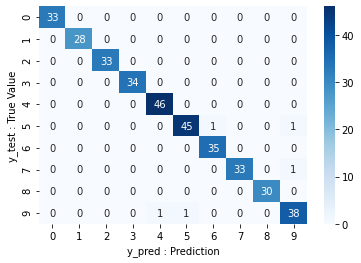

In [ ]:
# 4.6 시각적으로 확인하기 용이하도록 히트맵을 생성 : sns.headmap()

# heatmap으로 상관관계 분석
sns.heatmap(kNN_cm, cmap='Blues', annot=True) 
plt.xlabel('y_pred : Prediction') # x축의 데이터 이름
plt.ylabel('y_test : True Value') # y축의 데이터 이름
plt.show() # 가공된 heatmap 한번에 보여주기

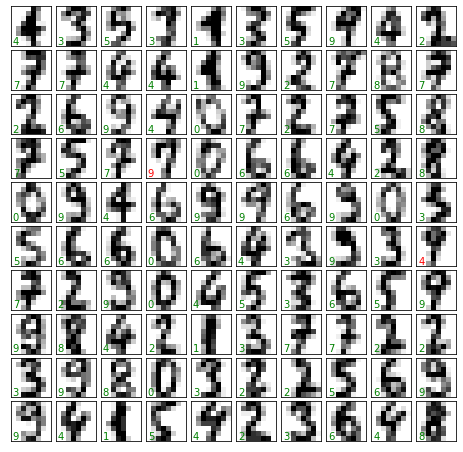

In [ ]:
# 4.7 100개의 숫자 이미지에 대해서 정답여부 확인 (# 2.9 이용)
# 첫 페이지는 모두 정답이여서 i = 100 부터 출력

# 10 x 10개의 공간을 만든다.
fig, axes = plt.subplots( 10,10, figsize = (8,8),
                         subplot_kw = dict( xticks = [], yticks = []),
                         gridspec_kw = dict(hspace = 0.1, wspace= 0.1))

# 100개의 숫자를 차례로 시각화 한다. (i = 100 부터 시작한다.)
for i , ax in enumerate (axes.flat, start = 100):
  ax.imshow(X_test[i].reshape(8,8), cmap = 'binary', interpolation = 'nearest')
  ax.text(0.05, 0.05, str(y_pred[i]),
          transform= ax.transAxes,
          color = 'green' if (y_test[i] == y_pred[i]) else 'red')
# 마지막 줄에 정답일 경우 green, 오답이면 red가 되도록 설정함

##**5. RF 랜덤포래스트로 분류하고 평가하기**
다음의 순서로 랜덤포래스트 머신러닝을 수행합니다.
- 5.1 학습을 위한 알고리즘의 선택 : RF = 알고리즘(추정횟수 지정 n_estimator)
- 5.2 학습 데이터로 모델을 훈련 : RF.fit
- 5.3 훈련된 모델을 이용해서 검증데이터로 예측값 생성 : RF.predict(X_test) --> y_pred
- 5.4 예측값과 검증데이터 정답을 비교해서 정확도 확인 : accuracy_score(y_test, y_pred)
- 5.5 세부적인 예측 결과 확인하기 위해서 타깃별로 정오표 생성 :  confusion_matrix (y_test, y_pred)
- 5.6 시각적으로 확인하기 용이하도록 히트맵을 생성 : sns.headmap()
- 5.7 100개의 숫자 이미지에 대해서 정답여부 확인 (# 2.9 이용)

In [ ]:
# 5.1 학습을 위한 알고리즘의 선택 : RF = 알고리즘(추정횟수 지정 n_estimator)
# RandomForest 분류를 수행하기 위해 모델을 읽어 들인다. 
from sklearn.ensemble import RandomForestClassifier

# 1000개의 나무를 생성하여 kNN 알고리즘을 활용해서 분리하겠다고 선언함 
RF = ******* (n_estimators = 1000)

In [ ]:
# 5.2 학습 데이터로 모델을 훈련 : RF.fit
# X_train,y_train 훈련데이터를 입력하여 RF 모델을 생성함

RF.*** (X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# 5.3 훈련된 모델을 이용해서 검증데이터로 예측값 생성 : RF.predict(X_test) --> y_pred
y_pred = RF.predict (X_test)

In [ ]:
# 5.4 예측값과 검증데이터 정답을 비교해서 정확도 확인 : accuracy_score(y_test, y_pred)

# 모델 학습 및 정확도 분석
RF_accuracy= accuracy_score(y_test, y_pred) # 실제 y값과 예측값 y의 정확도를 확인함

print("RandomForest's Accuracy is ", RF_accuracy.round(4)) 

RandomForest's Accuracy is  0.975


In [ ]:
# 5.5 세부적인 예측 결과 확인하기 위해서 타깃별로 정오표 생성 
#      : confusion_matrix (y_test, y_pred)

# y_test값을 행으로 y_pred의 값을 열로 하여 예측치와 실제값이 차이를 확인 가능함
RF_cm = confusion_matrix (y_test, y_pred) 
RF_cm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 38]])

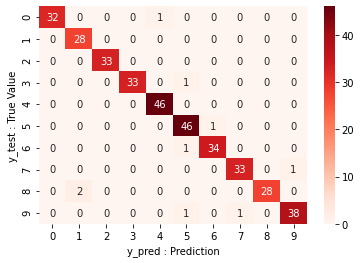

In [ ]:
# 5.6 시각적으로 확인하기 용이하도록 히트맵을 생성 : sns.headmap()
# heatmap으로 상관관계 분석
sns.heatmap(RF_cm, cmap='Reds', annot=True) 
plt.xlabel('y_pred : Prediction') # x축의 데이터 이름
plt.ylabel('y_test : True Value') # y축의 데이터 이름
plt.show() # 가공된 heatmap 한번에 보여주기

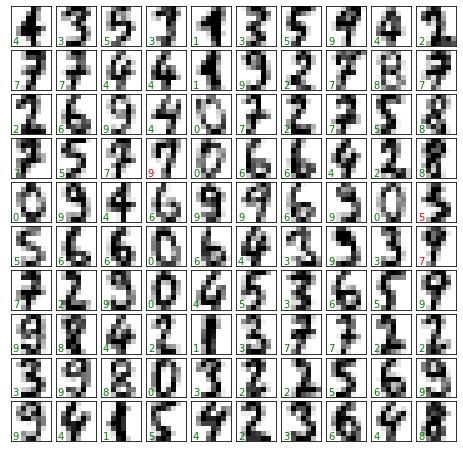

In [ ]:
# 5.7 100개의 숫자 이미지에 대해서 정답여부 확인 (# 2.9 이용)
# 10 x 10개의 공간을 만든다.
fig, axes = plt.subplots( 10,10, figsize = (8,8),
                         subplot_kw = dict( xticks = [], yticks = []),
                         gridspec_kw = dict(hspace = 0.1, wspace= 0.1))

# 100개의 숫자를 차례로 시각화 한다. (i = 100 부터 시작한다.)
for i , ax in enumerate (axes.flat, start = 100):
  ax.imshow(X_test[i].reshape(8,8), cmap = 'binary', interpolation = 'nearest')
  ax.text(0.05, 0.05, str(y_pred[i]),
          transform= ax.transAxes,
          color = 'green' if (y_test[i] == y_pred[i]) else 'red')
# 마지막 줄에 정답일 경우 green, 오답이면 red가 되도록 설정함

##**6. kNN 과 RF 정확도 비교**

In [ ]:
# 6.1, 4.4와 5.4에서 산출한 정확도를 비교해본다. 

print("kNN's Accuracy is ", kNN_accuracy.round(4))
print("RandomForest's Accuracy is ", RF_accuracy.round(4)) 